# PyGMTの導入

In [1]:
# https://forum.generic-mapping-tools.org/t/colab-example-on-github-try-pygmt-online-not-working-any-more/1790/11
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
!mamba install pygmt


Looking for: ['pygmt']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cudatoolkit 11.8.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



# PyGMTでプロット

## サイズ固定でプロット

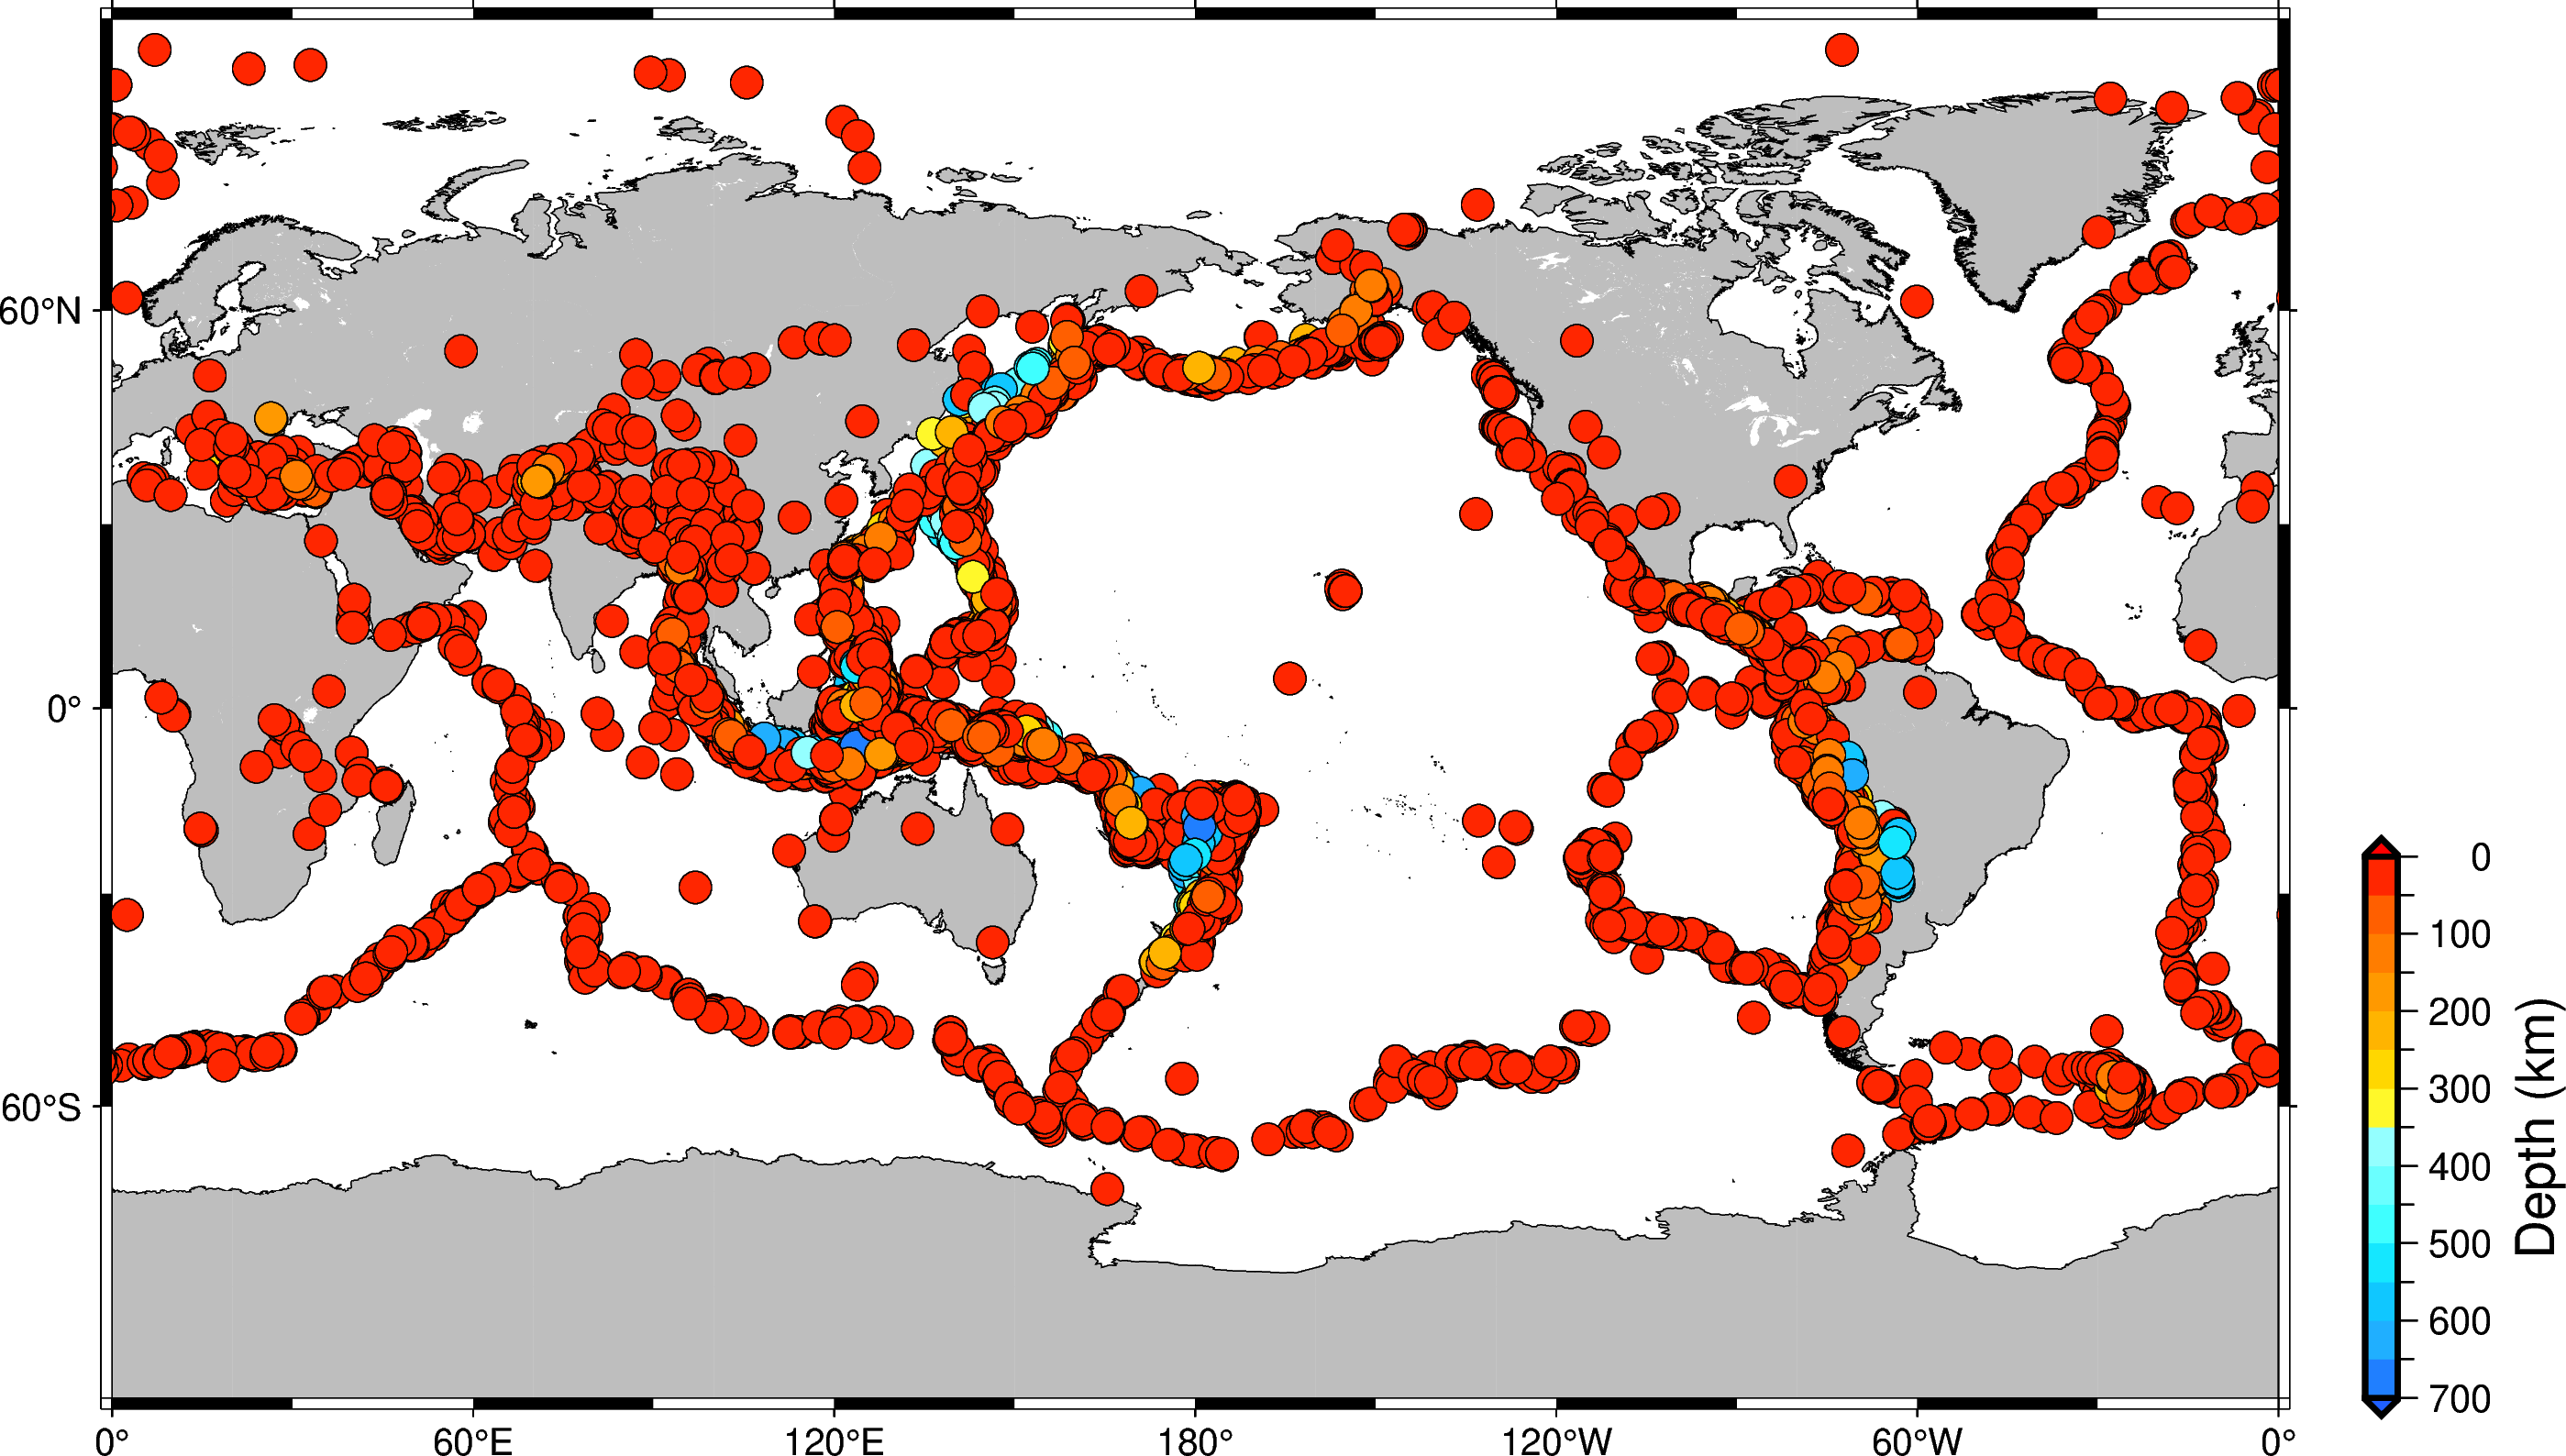

In [3]:
import pygmt
import requests

# 2018-2022年のM5+の地震
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2018-01-01&endtime=2022-12-31&minmagnitude=5&eventtype=earthquake'
# 過去30日間のM4.5+の地震
# url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson&eventtype=earthquake'

json = requests.get(url).json()
earthquake_data = json['features']

coordinates = [quake['geometry']['coordinates'] for quake in earthquake_data]
longitudes = [coord[0] for coord in coordinates]
latitudes = [coord[1] for coord in coordinates]
depths = [coord[2] for coord in coordinates]

fig = pygmt.Figure()
fig.coast(
    projection='Cyl_stere/20c',
    region='g',
    resolution='l',
    land='gray',
    shorelines='1/thinnest',
    frame='a60f30'
)
pygmt.makecpt(
    cmap='no_green',
    series='0/700/50',
    reverse=True)
fig.plot(
    x=longitudes,
    y=latitudes,
    style='c0.3',
    pen='thinnest',
    cmap=True,
    fill=depths
)
fig.colorbar(
    position='JBR+jBL+o0.8/0+w-5/0.3+e',
    frame='a100f50+l"Depth (km)"'
)
fig.show()

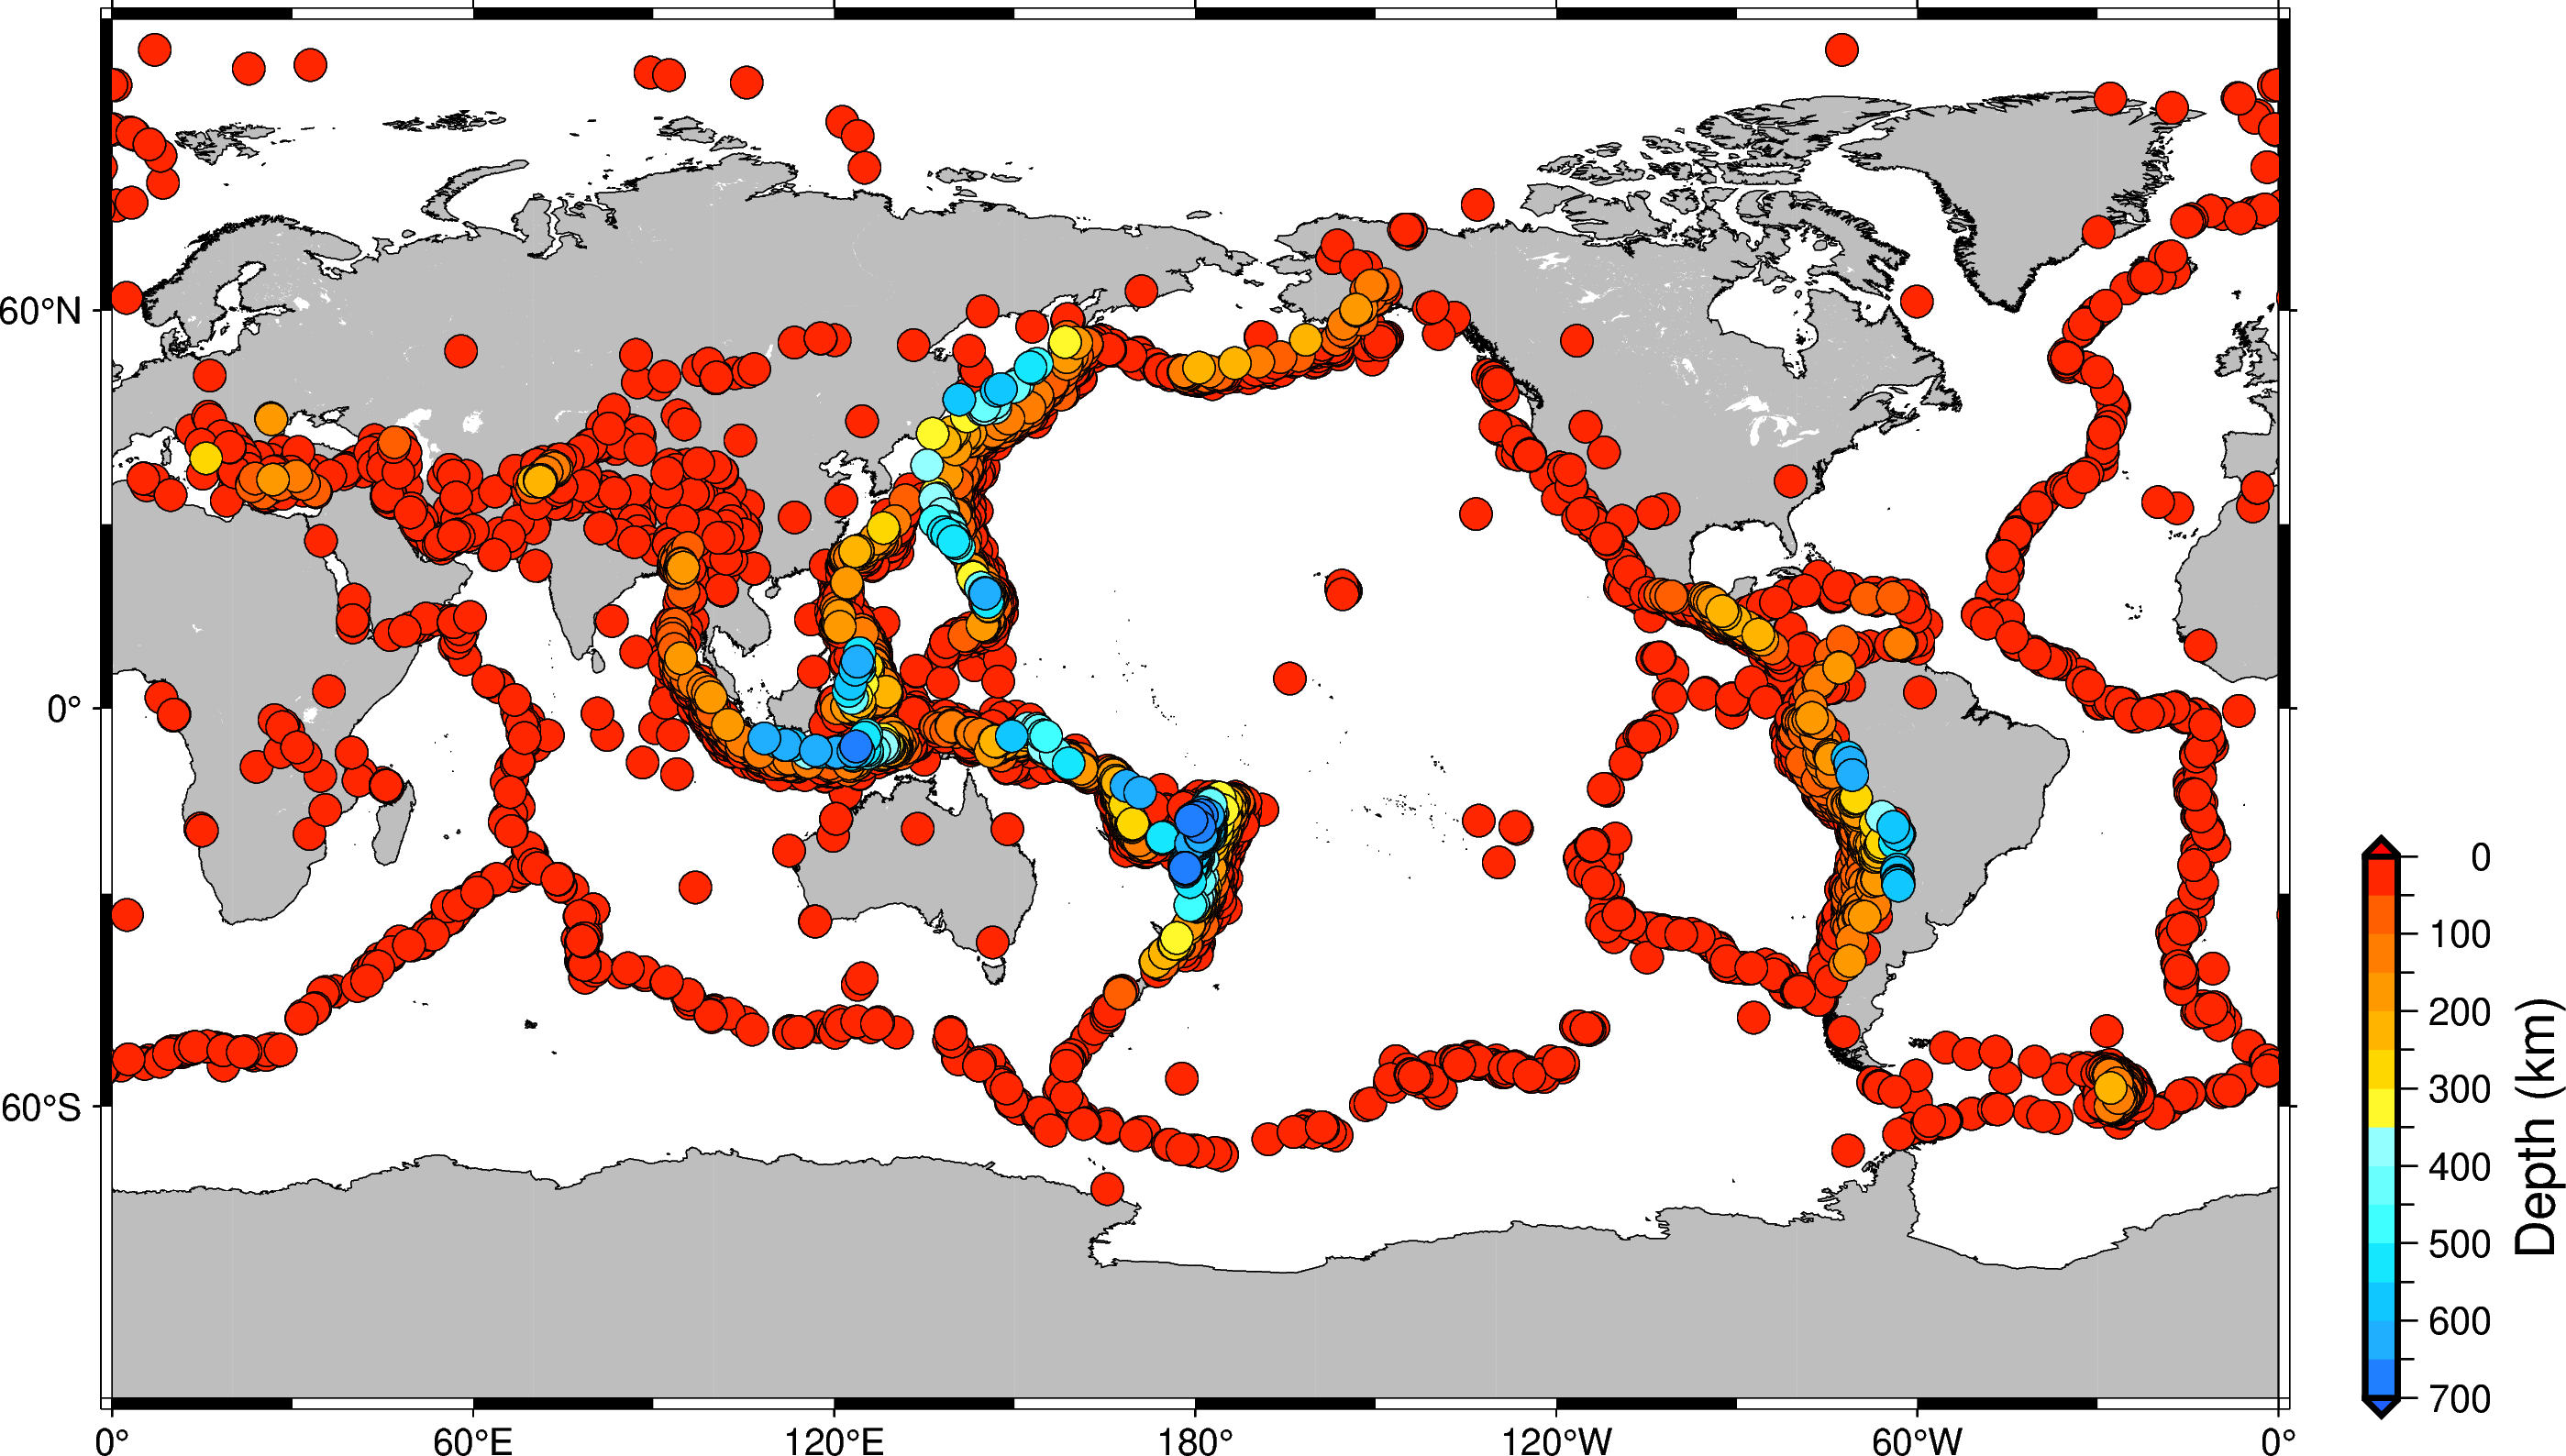

In [4]:
# pandasを使って深さでソートしてからプロット
import pandas as pd

df = pd.json_normalize(json['features'])

df['longitude'] = df['geometry.coordinates'].apply(lambda coord: coord[0])
df['latitude'] = df['geometry.coordinates'].apply(lambda coord: coord[1])
df['depth'] = df['geometry.coordinates'].apply(lambda coord: coord[2])

df_sorted = df.sort_values(by='depth')

fig = pygmt.Figure()
fig.coast(
    projection='Cyl_stere/20c',
    region='g',
    resolution='l',
    land='gray',
    shorelines='1/thinnest',
    frame='a60f30'
)
pygmt.makecpt(
    cmap='no_green',
    series='0/700/50',
    reverse=True)
fig.plot(
    x=df_sorted['longitude'],
    y=df_sorted['latitude'],
    style='c0.3',
    pen='thinnest',
    cmap=True,
    fill=df_sorted['depth']
)
fig.colorbar(
    position='JBR+jBL+o0.8/0+w-5/0.3+e',
    frame='a100f50+lDepth (km)'
)
fig.show()

## サイズ可変でプロット

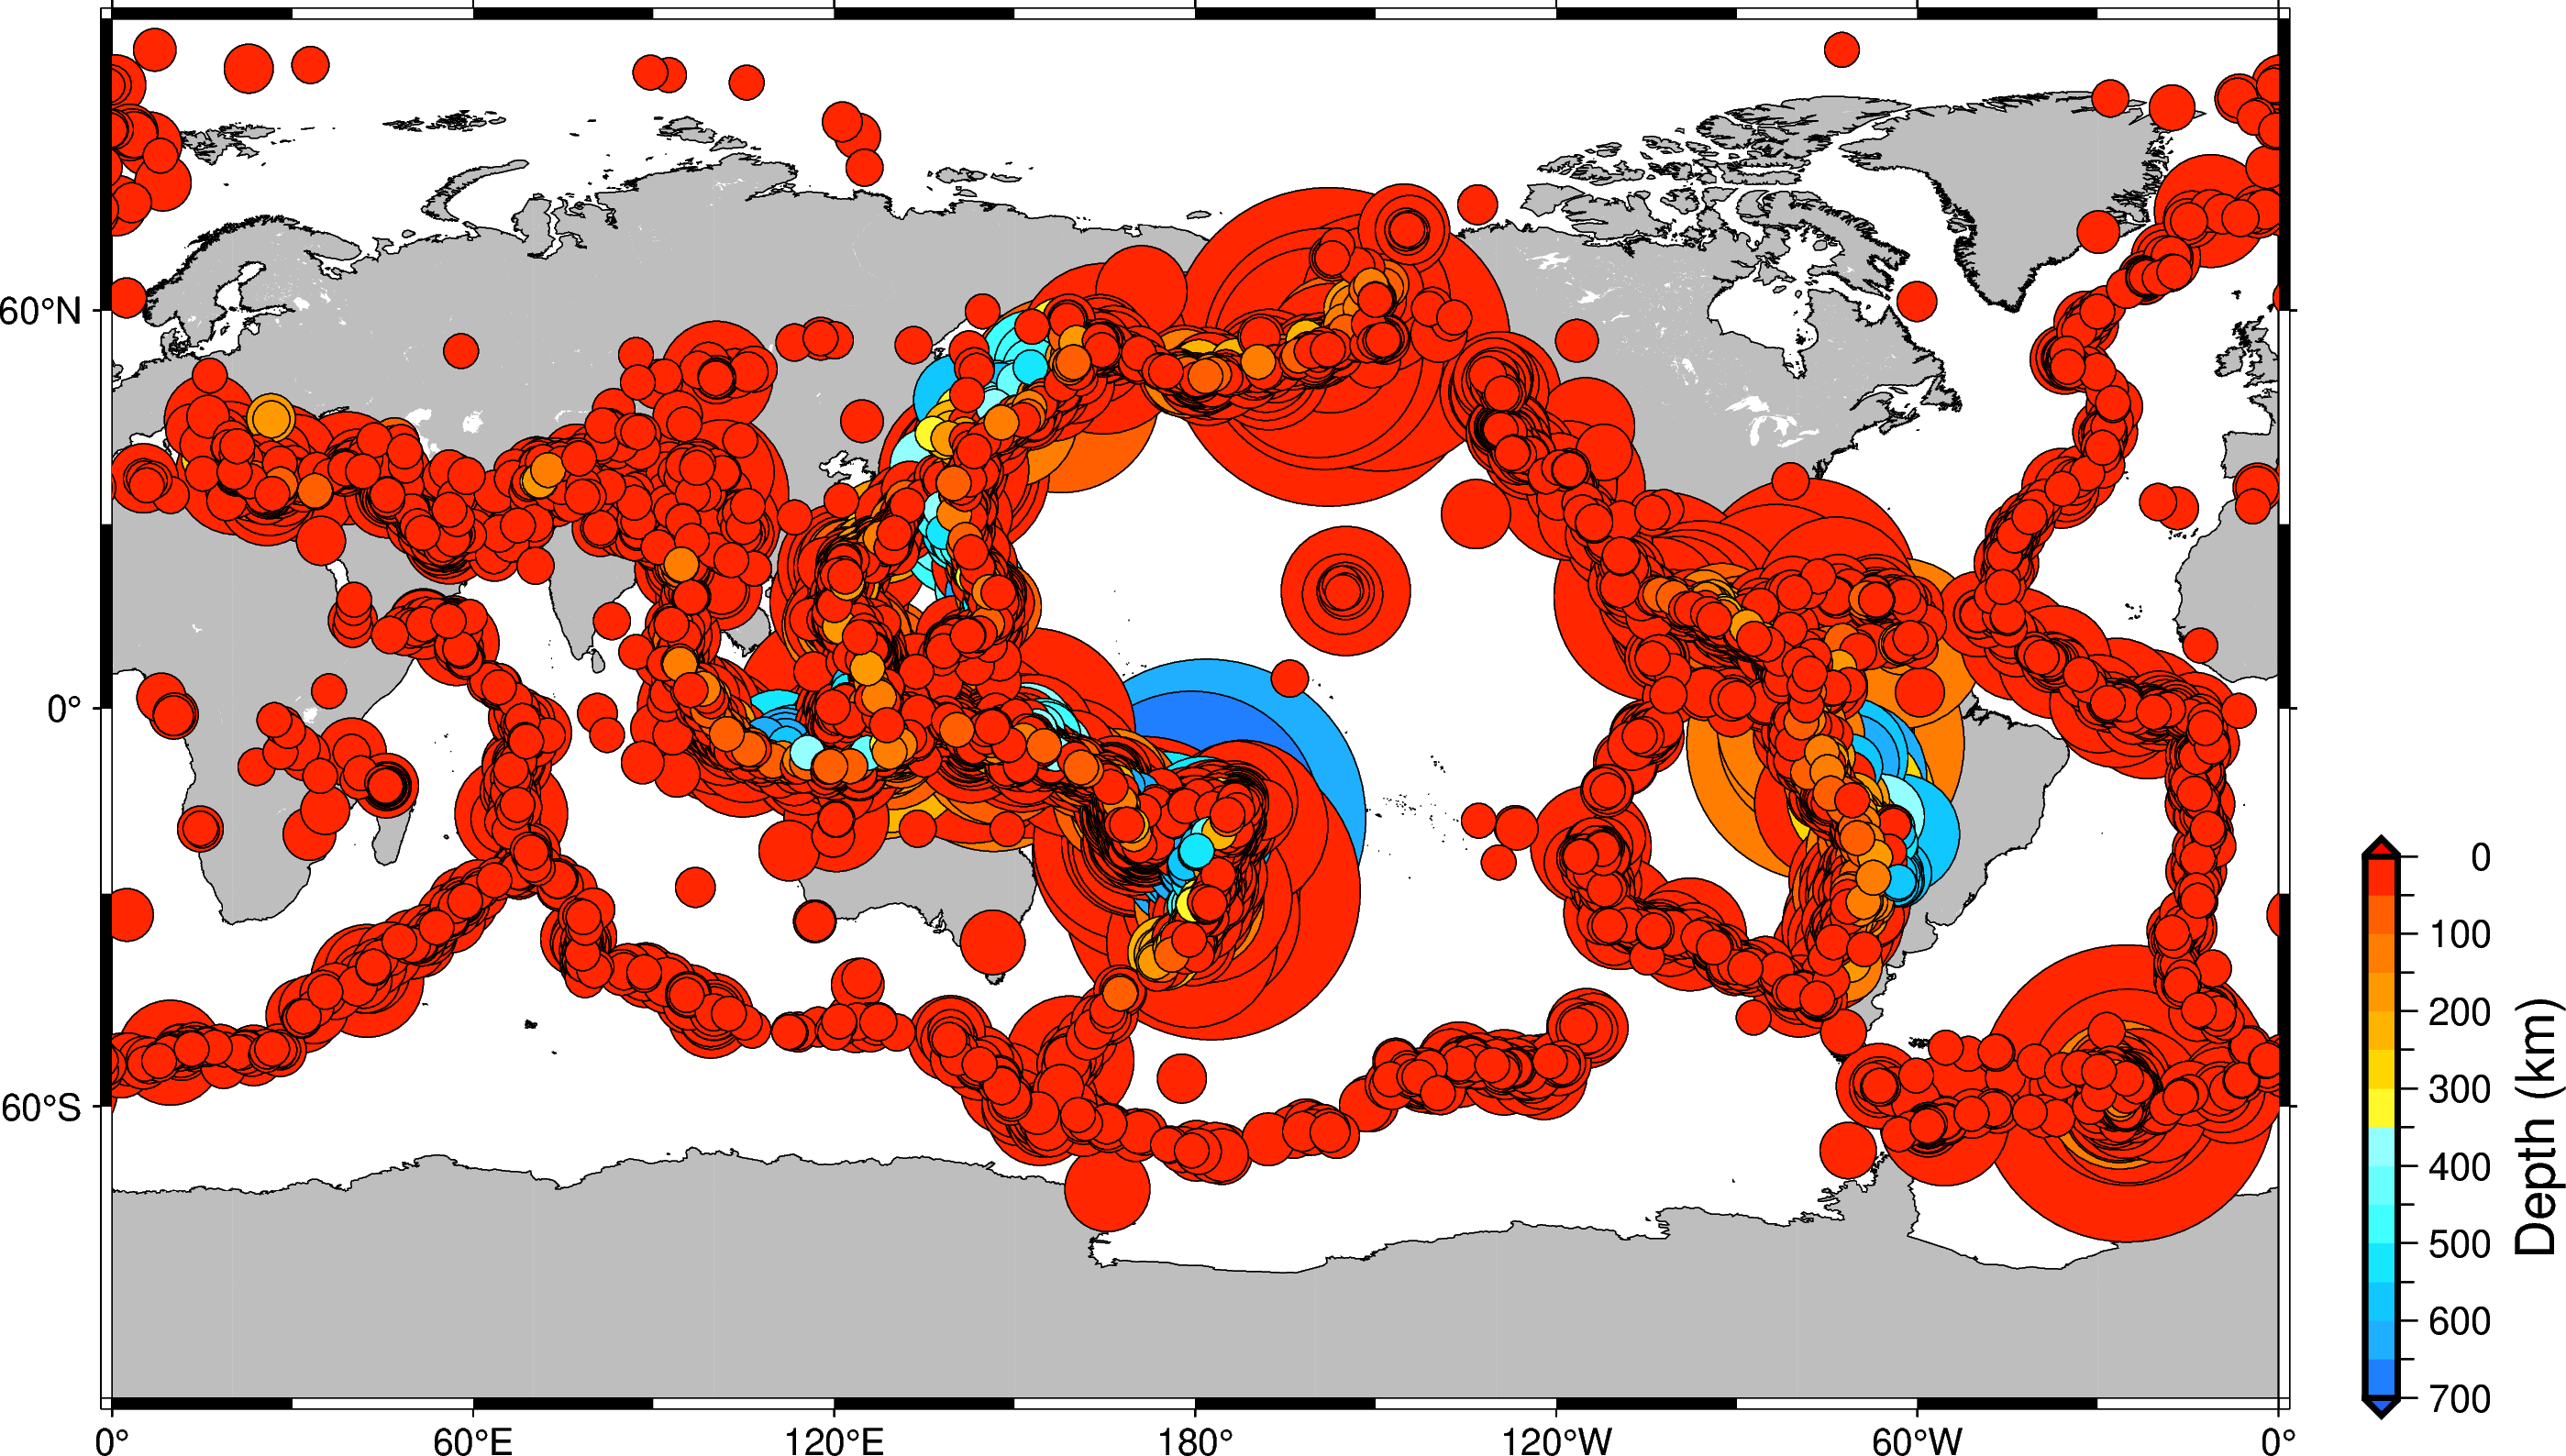

In [5]:
# 2018-2022年のM5+の地震
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2018-01-01&endtime=2022-12-31&minmagnitude=5&eventtype=earthquake&orderby=magnitude'
# 過去30日間のM4.5+の地震
# url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson&eventtype=earthquake&orderby=magnitude'

json = requests.get(url).json()
earthquake_data = json['features']

magnitudes = [quake['properties']['mag'] for quake in earthquake_data]

coordinates = [quake['geometry']['coordinates'] for quake in earthquake_data]
longitudes = [coord[0] for coord in coordinates]
latitudes = [coord[1] for coord in coordinates]
depths = [coord[2] for coord in coordinates]

fig = pygmt.Figure()
fig.coast(
    projection='Cyl_stere/20c',
    region='g',
    resolution='l',
    land='gray',
    shorelines='1/thinnest',
    frame='a60f30'
)
pygmt.makecpt(
    cmap='no_green',
    series='0/700/50',
    reverse=True)
fig.plot(
    x=longitudes,
    y=latitudes,
    style='c',
    pen='thinnest',
    size=[0.01 * ( 2 ** magnitude ) for magnitude in magnitudes],
    cmap=True,
    fill=depths
)
fig.colorbar(
    position='JBR+jBL+o0.8/0+w-5/0.3+e',
    frame='a100f50+l"Depth (km)"'
)
fig.show()